<div align="center">

# 🧠 FuzzyLite: Fuzzy Logic Control Systems in Python

Welcome to this interactive Jupyter Notebook, where you will explore the design and simulation of fuzzy logic controllers using the **FuzzyLite** library. Here, you'll find hands-on examples of Mamdani, Takagi-Sugeno (TSK), and Tsukamoto inference systems, complete with visualizations and code explanations.

---

**Author:** _Profesor Francisco Navarro_

</div>

# FuzzyLite

The **FuzzyLite** libraries refer to the *fuzzylite* and *jfuzzylite* libraries for the **C++** and **Java** programming languages, respectively. The goal of the FuzzyLite libraries is to easily design and efficiently operate FLCs following an object-oriented programming model without relying on external libraries.

This library includes a wide range of membership functions as described by the following table:

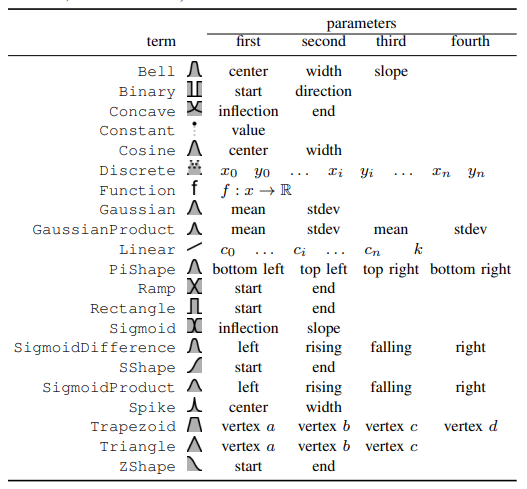

In [1]:
# Uncomment and run the following command if FuzzyLite is not installed yet
!pip install pyfuzzylite
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import fuzzylite as fl
#Declaring and Initializing the Fuzzy Engine

engine = fl.Engine(name='Tipper',
    description='Simple Tipper Fuzzy System which models how you might choose to tip at a restaurant')

#Defining the Input Variables (Fuzzification)
engine.input_variables = [
    fl.InputVariable(
    name='Quality', description='Quality of food', enabled=True,
    minimum=0.0, maximum=10.0, lock_range=False,
    terms=[fl.Triangle('BAD',0,0,10),
           fl.Triangle('DECENT',2.5,5,7.5),
           fl.Triangle('GREAT',5,10,10)]
    ),
    fl.InputVariable(
    name='Service', description="Waiter's Service",
    enabled=True, # Whether this variable is active in the system
    minimum=0.0, maximum=10.0,
    lock_range=False, # Prevent automatic range adjustment
    terms=[fl.Triangle('POOR',0,0,10),
           fl.Triangle('ACCEPTABLE',2.5,5,7.5),
           fl.Triangle('AMAZING',5,10,10)])
]

#Defining the Output Variables (Defuzzification)
engine.output_variables = [
    fl.OutputVariable(
    name='mTip', description='Percentage of tipping based on Mamdani', enabled=True,
    minimum=0.0, maximum=30.0, lock_range=False, # Keep range fixed during operation
    aggregation=fl.Maximum(), # Method to combine rule outputs (MAX)
    defuzzifier=fl.Centroid(200), # Defuzzification method (200 samples)
    default_value = fl.nan, # Value when no rules fire
    lock_previous=False, # Prevent locking of previous output
    # Defining the output terms (fuzzy sets)
    terms=[fl.Gaussian('LOW',0,6),
           fl.Gaussian('MEDIUM',15,6),
           fl.Gaussian('HIGH',30,6)])]

You can see in this code that the `Defuzzifier` is called **Centroid**.
*FuzzyLite* provides different kinds of *Fuzzifiers*, as listed here. All you need to do is replace them in the previous code:
* `fl.Centroid()`
* `fl.LargestOfMaximum()`
* `fl.MeanOfMaximum()`
* `fl.SmallestOfMaximum()`
* `fl.WeightedAverage()`
* `fl.WeightedSum()`

Defining the Output Variables (Defuzzification) for Mamdani inference system.

In [3]:
#Creation of Fuzzy Rule Base (Mamdani)
# Antecedent terms serving as inputs to this rule.
engine.rule_blocks = [
      fl.RuleBlock(
      name='Mamdani Tipping', description='Mamdani FIS for Tipping',
      enabled=True,
      conjunction=fl.Minimum(), # AND
      disjunction=fl.Maximum(), # OR
      implication=fl.Minimum(),
      activation=fl.General(), # Activation method that activates every rule of a rule block in insertion order
      rules=[
        fl.Rule.create("if Quality is BAD and Service is POOR then mTip is LOW", engine),
        fl.Rule.create("if Quality is BAD and Service is ACCEPTABLE then mTip is LOW", engine),
        fl.Rule.create("if Quality is BAD and Service is AMAZING then mTip is MEDIUM", engine),
        fl.Rule.create("if Quality is DECENT and Service is ACCEPTABLE then mTip is MEDIUM", engine),
        fl.Rule.create("if Quality is GREAT and Service is AMAZING then mTip is HIGH", engine)]
      )
]

# TSK
Takagi-Sugeno FLCs are designed with (a) output variables having special terms, and (b) a weight-based defuzzifier. The output variables have terms whose membership functions reflect a constant value or a linear combinations of the input values.

The constant value is any $k ∈ R$, and the linear
combination of input values is in the form $\sum_i c_ix_i +k$, where $c_i, x_i ∈ R$ are the coefficient and input value for variable $i$.

The weight-based defuzzifier is computed using the results of the membership functions as values and the activation degrees as weights

In [4]:
# Let's add a TSK output block to the FIS
tskTip = fl.OutputVariable()
tskTip.name = "tskTip"
tskTip.description = "tip based on Takagi-Sugeno inference"
tskTip.enabled = True
tskTip.range = (0.000, 30.000)
tskTip.lock_range = False # lock the value to the range of the variable
tskTip.aggregation = None # IMPORTANTE
tskTip.defuzzifier = fl.WeightedAverage("TakagiSugeno") # IMPORTANTE
tskTip.default_value = fl.nan
tskTip.lock_previous = False # lock the previous value of the output variable
tskTip.terms.append(fl.Constant("cheap", 5.000))
tskTip.terms.append(fl.Constant("average", 15.000))
tskTip.terms.append(fl.Constant("generous", 25.000))
engine.output_variables.append(tskTip)

In [5]:
# Reglas TSK grado 0
takagiSugeno = fl.RuleBlock()
takagiSugeno.name = "takagiSugeno"
takagiSugeno.description = "Takagi-Sugeno inference"
takagiSugeno.enabled = True
takagiSugeno.conjunction = fl.AlgebraicProduct()
takagiSugeno.disjunction = fl.AlgebraicSum()
takagiSugeno.implication = None
takagiSugeno.activation = fl.General()
takagiSugeno.rules=[
        fl.Rule.create("if Quality is BAD and Service is POOR then tskTip is cheap", engine),
        fl.Rule.create("if Quality is BAD and Service is ACCEPTABLE then tskTip is cheap", engine),
        fl.Rule.create("if Quality is BAD and Service is AMAZING then tskTip is average", engine),
        fl.Rule.create("if Quality is DECENT and Service is ACCEPTABLE then tskTip is average", engine),
        fl.Rule.create("if Quality is GREAT and Service is AMAZING then tskTip is generous", engine)]

engine.rule_blocks.append(takagiSugeno)

# Tsukamoto
Tsukamoto FLCs are designed with (a) output variables having monotonic terms, and (b) a weight-based defuzzifier.

The terms in the output variables have either monotonically increasing or monotonically decreasing membership functions, i.e., for all $x ≤ y$ then $\mu(x) ≤ \mu(y)$ or $\mu(x) ≥ \mu(y)$, respectively.

The weight-based defuzzifier uses the activation degrees as weights, and for the values uses the arguments of the membership functions that produce the respective activation degrees.

In [6]:
# Let's add a Tsukamoto output block to the FIS
tsTip = fl.OutputVariable()
tsTip.name = "tsuTip"
tsTip.description = "Tip based on Tsukamoto inference"
tsTip.enabled = True
tsTip.range = (0.000, 30.000)
tsTip.lock_range = True # lock the value to the range of the variable
tsTip.aggregation = None
tsTip.defuzzifier = fl.WeightedAverage("Tsukamoto")
tsTip.default_value = fl.nan
tsTip.lock_previous = False # lock the previous value of the output variable
tsTip.terms.append(fl.Concave("cheap", 5.0, 4.0)) # inflection, end
tsTip.terms.append(fl.SShape("average", 12.0, 20.0)) # start, end
tsTip.terms.append(fl.Sigmoid("generous", 20.0, 30)) # inflection, slope
engine.output_variables.append(tsTip)

In [7]:
# Reglas Tsukamoto
tsukamoto = fl.RuleBlock()
tsukamoto.name = "Tsukamoto"
tsukamoto.description = "Tsukamoto inference"
tsukamoto.enabled = True
tsukamoto.conjunction = fl.Minimum()
tsukamoto.disjunction = fl.Maximum()
tsukamoto.implication = fl.Minimum()
tsukamoto.activation = fl.General()
tsukamoto.rules=[
        fl.Rule.create("if Quality is BAD and Service is POOR then tsuTip is cheap", engine),
        fl.Rule.create("if Quality is BAD and Service is ACCEPTABLE then tsuTip is cheap", engine),
        fl.Rule.create("if Quality is BAD and Service is AMAZING then tsuTip is average", engine),
        fl.Rule.create("if Quality is DECENT and Service is ACCEPTABLE then tsuTip is average", engine),
        fl.Rule.create("if Quality is GREAT and Service is AMAZING then tsuTip is generous", engine)]

engine.rule_blocks.append(tsukamoto)

### Control System Creation
Now that we have our rules defined, we can simply simulate our control system by specifying the inputs and calling the `process` method.

In [8]:
# Ingresar valores de entrada
engine.input_variables[0].value = fl.scalar(5) # Quality
engine.input_variables[1].value = fl.scalar(5) # Service

In [9]:
engine.process() # computa datos

In [10]:
# Generar salida
for ov, met in zip(engine.output_variables, ['Mamdani', 'TSK', 'Tsukamoto']):
    print('Tip according to ' + met + ': ' + fl.Op.str(ov.value))

Tip according to Mamdani: 13.408
Tip according to TSK: 10.714
Tip according to Tsukamoto: nan


In [11]:
import math
import numpy as np
import plotly.graph_objects as go

def getControlSurfaceData(input1Discs,input2Discs, inference_method):
        """Get the data to plot the control surface"""
        x = np.linspace(engine.input_variables[0].minimum, engine.input_variables[0].maximum, input1Discs)
        y = np.linspace(engine.input_variables[1].minimum, engine.input_variables[1].maximum, input2Discs)
        z = [ [0]*input1Discs for i in range(input2Discs)]

        for x_ in range(input1Discs):
            engine.input_variables[0].value = fl.scalar(x[x_])
            for y_ in range(input2Discs):
                engine.input_variables[1].value = fl.scalar(y[y_])
                engine.process()
                if inference_method=='mamdani':
                    out = engine.output_variables[0].value
                elif inference_method=='tsk':
                    out = engine.output_variables[1].value
                elif inference_method=='tsukamoto':
                    out = engine.output_variables[2].value
                if out == None or math.isnan(out):
                    z[y_][x_] = 0.0
                else:
                    z[y_][x_] = out

        fig = go.Figure(data=[go.Surface(z=z)])
        fig.update_layout(title='Control Surface by '+inference_method, autosize=False, scene = dict(
                    xaxis_title=engine.input_variables[0].name, yaxis_title=engine.input_variables[1].name, zaxis_title='Tip'),
                    width=700, height=500, margin=dict(l=65, r=50, b=65, t=90))
        fig.show()

In [12]:
#Plot control surface
getControlSurfaceData(50,50, 'mamdani')

In [13]:
#Plot control surface
getControlSurfaceData(50,50, 'tsk')

In [14]:
#Plot control surface
getControlSurfaceData(50,50, 'tsukamoto')

In [15]:
#Plot control surface
getControlSurfaceData(50,50, 'tsk')

In [16]:
#Plot control surface
getControlSurfaceData(50,50, 'tsukamoto')